# Premiers pas en *matplotlib*

## Auteur:
Joseph Salmon
<joseph.salmon@umontpellier.fr>

In [1]:
import os
import sys
# utile pour avoir un affichage identique dans divers notebook
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt

# commande "magique" pour améliorer la visualiation
%matplotlib notebook
# %matplotlib inline

In [2]:
import matplotlib
matplotlib.__version__

'2.2.3'

In [3]:
dirname = "../prebuiltimages"
imageformat = ".pdf"

In [4]:
# Creations de tableau 1D avec valeurs numériques
x1 = np.linspace(0.0, 5.0, num=50)
x2 = np.linspace(0.0, 2.0, num=50)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

<IPython.core.display.Javascript object>


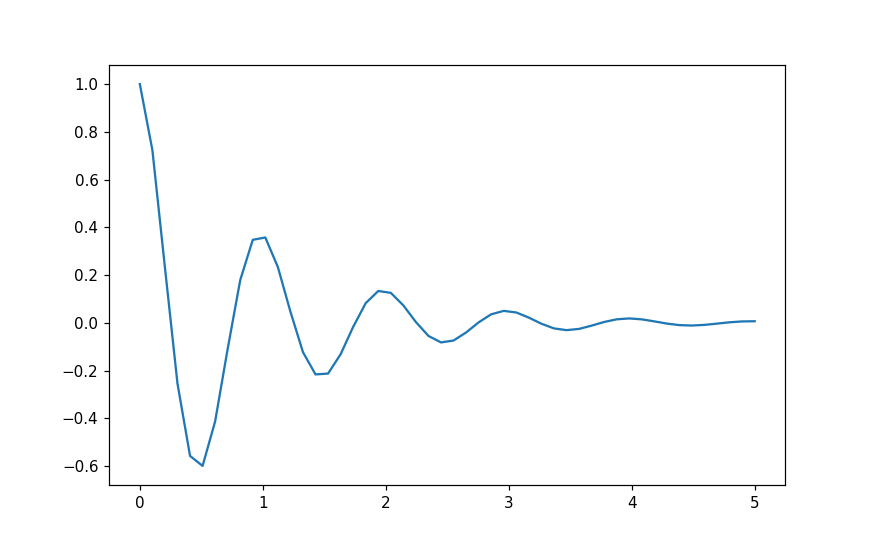

In [5]:
# Affichage graphique
fig1 = plt.figure(figsize=(8, 5))
plt.plot(x1, y1)
plt.show()  # Pour forcer l'affichage, notamment sans %matplolib inline

### ATTENTION: Mauvaise pratique!
L'exemple ci-dessus est "léger" car il n'a pas de titre, de précision sur les axes, etc. etc.

# Export de fichiers images sous divers formats:

## Formats matriciels (en anglais: bitmap):
- png (format brut, non compressé, s'ouvre avec <a href="https://www.gimp.org/">Gimp</a>)
- jpg (format compressé)

## Formats vectoriels
- pdf (à privilégier dans vos documents)
- svg (facile à modifier avec  <a href="https://inkscape.org/fr/">Inskscape</a>)
- ps
- eps


# png:

In [6]:
# Export en png: 
fig1.savefig("ma_figure_pas_belle.png", format='png', dpi=90) # dot per inch
fig1.savefig("ma_figure_pas_belle.pdf", format='pdf', dpi='figure') # dot per inch

 ## Visualisation du png créé (noter la perte de précision du bitmap)

In [7]:
import skimage
from skimage import io
skimage.__version__

'0.14.0'

<IPython.core.display.Javascript object>


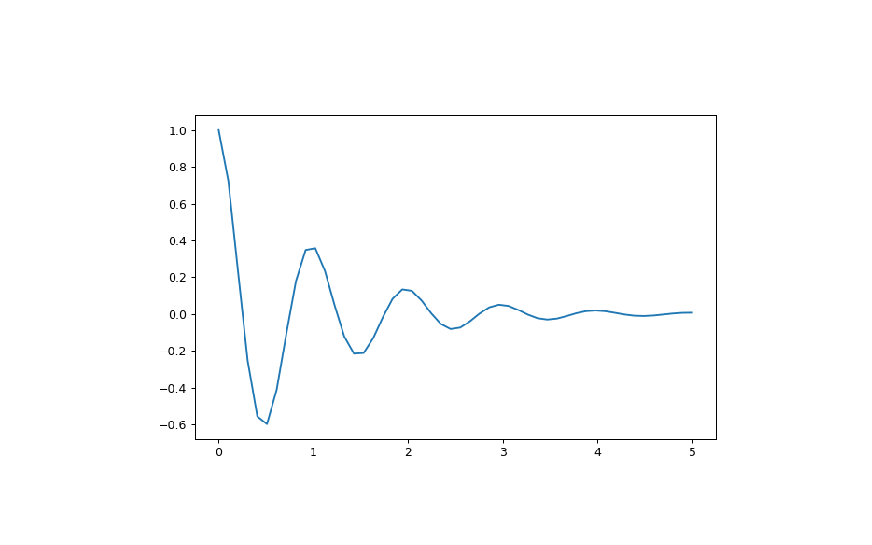

(450, 720, 4)


(-0.5, 719.5, 449.5, -0.5)

In [8]:
fig_png = plt.figure(figsize=(8, 5))
array_from_png = io.imread("ma_figure_pas_belle.png")
print(array_from_png.shape)
plt.imshow(array_from_png)
plt.axis('off')

# Format jpg:

/home/jo/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<IPython.core.display.Javascript object>


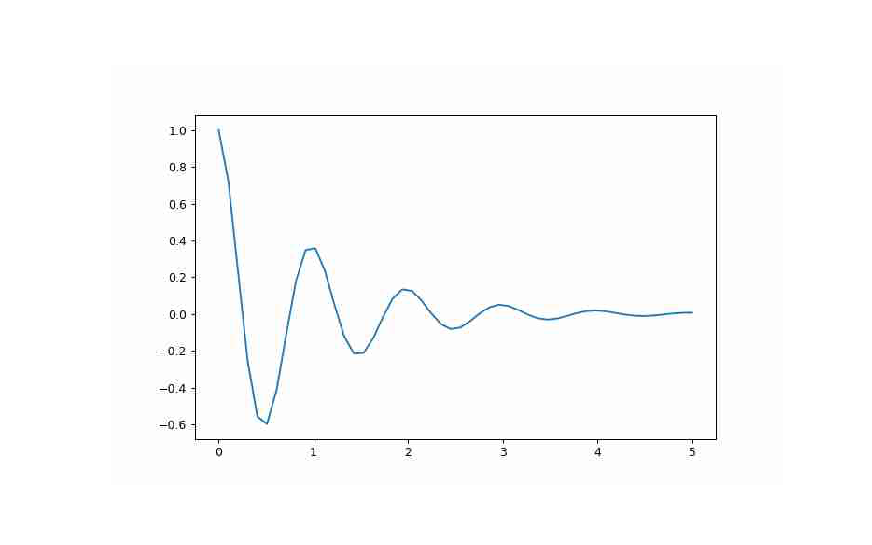

In [9]:
# Export en jpg basse qualité
io.imsave("ma_figure_pas_belle20.jpg",
          skimage.color.rgba2rgb(array_from_png), quality=20)
# Visualisation du jpg
array_from_jpeg = skimage.io.imread("ma_figure_pas_belle20.jpg")
plt.figure(figsize=(8, 5))
plt.imshow(array_from_jpeg)
plt.axis('off')
plt.show()

/home/jo/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<IPython.core.display.Javascript object>


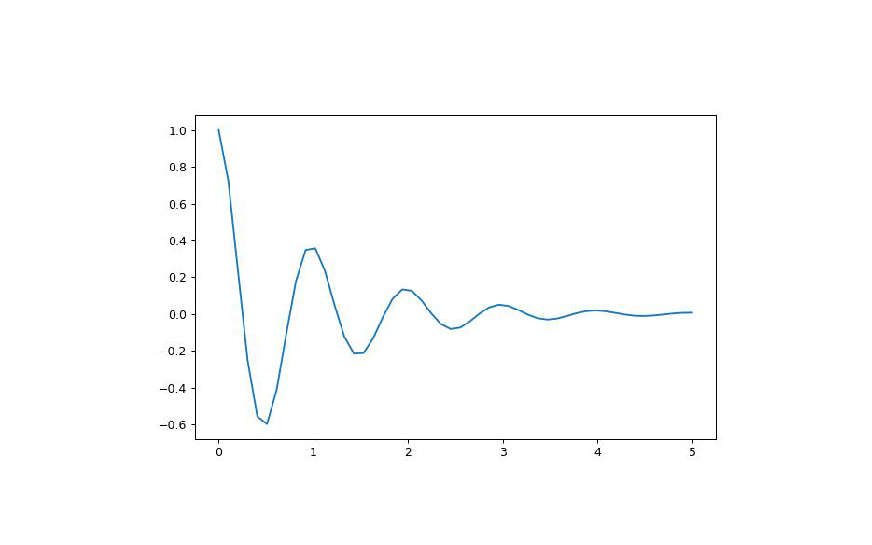

In [10]:
# Export en jpg qualité normale
io.imsave("ma_figure_pas_belle75.jpg",
          skimage.color.rgba2rgb(array_from_png), quality=75)  # 75 is default value, 100 best, 1 worst
array_from_jpeg = skimage.io.imread("ma_figure_pas_belle75.jpg")
plt.figure(figsize=(8, 5))
plt.imshow(array_from_jpeg)
plt.axis('off')
plt.show()

# Attention donc au jpeg/jpg:
c'est un format avec perte, il est à **proscrire** pour les rapports, comptes rendus, thèse, slides, etc.

# Format pdf: 
format à privilégier pour inclure des graphiques dans des rapports de tout genre.

In [11]:
fig1.savefig("ma_figure_plus_belle.pdf",format='pdf', dpi=90)

In [12]:
from IPython.display import IFrame
IFrame("ma_figure_plus_belle.pdf", width=400, height=250)

# Format svg:
format à privilégier pour inclure des graphiques dans des rapports de tout genre si l'on doit faire de la "retouche" (par exemple rajouter des éléments trop compliqués à ajuster en ligne de code, en passant par exemple par <a href="https://inkscape.org/fr/">Inskscape</a>)

In [13]:
fig1.savefig("ma_figure_plus_belle.svg",format='svg')

# Améliorations visuelles:

## Style: 
https://matplotlib.org/api/markers_api.html
{
".":"point",
",":"pixel",
"o":"circle",
"v":"triangle_down",
"^":"triangle_up",
"<":"triangle_left",
">":"triangle_right",
"1":"tri_down",
"2":"tri_up",
"3":"tri_left",
"4":"tri_right",
"8":"octagon",
"s":"square",
"p":"pentagon",
"*":"star",
"h":"hexagon1",
"H":"hexagon2",
"+":"plus",
"D":"diamond",
"d":"thin_diamond",
"|":"vline",
"_":"hline"
}


<IPython.core.display.Javascript object>


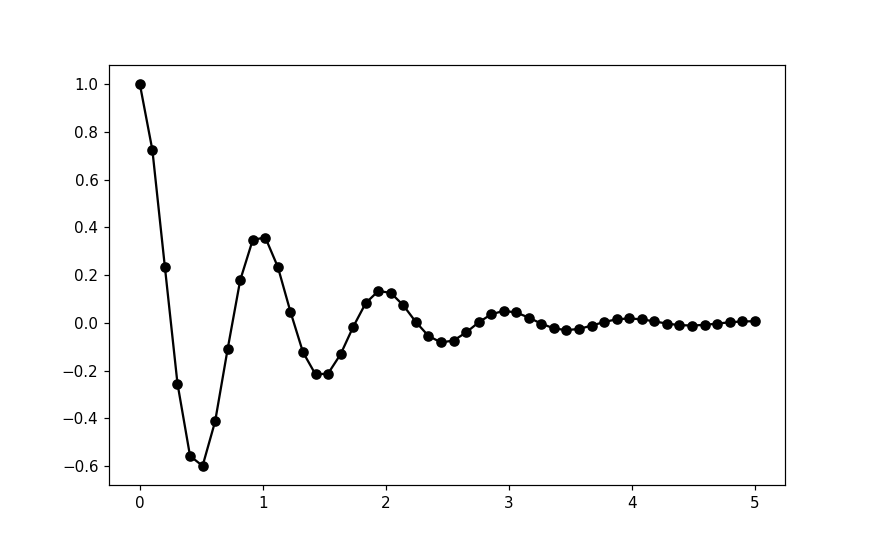

In [14]:
# Changer le le style en points ('o'), ligne ('-'), et couleur noire
fig1 = plt.figure(figsize=(8, 5))
plt.plot(x1, y1, 'o-', color='black')
plt.show()

## Titre et noms des axes 

<IPython.core.display.Javascript object>


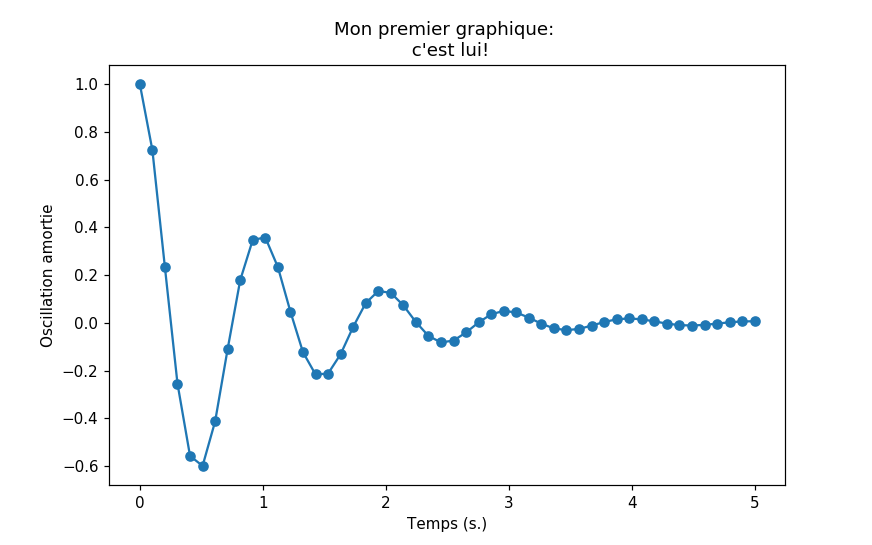

In [15]:
fig_jolie = plt.figure(figsize=(8, 5))
plt.plot(x1, y1, 'o-')  
plt.title("Mon premier graphique: \n c'est lui!")
plt.ylabel('Oscillation amortie')
plt.xlabel('Temps (s.)')
plt.show()
fig_jolie.savefig("ma_figure_jolie.pdf",format='pdf', dpi=90)

## Graphes et sous graphes

<IPython.core.display.Javascript object>


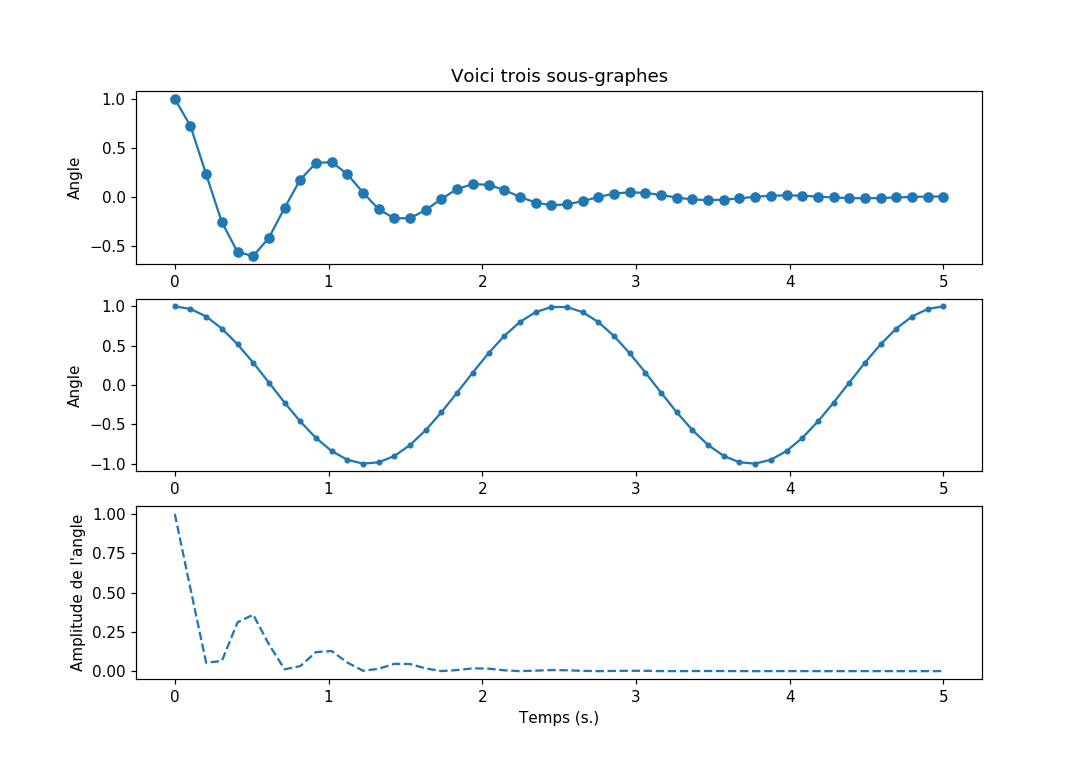

Text(0.5,0,'Temps (s.)')

In [16]:
fig2 = plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Voici trois sous-graphes')
plt.ylabel('Angle')

plt.subplot(3, 1, 2)
plt.plot(x1, y2, '.-')
plt.ylabel('Angle')

plt.subplot(3, 1, 3)
plt.plot(x1, y1**2, '--')
plt.ylabel("Amplitude de l'angle")
plt.xlabel('Temps (s.)')

<IPython.core.display.Javascript object>


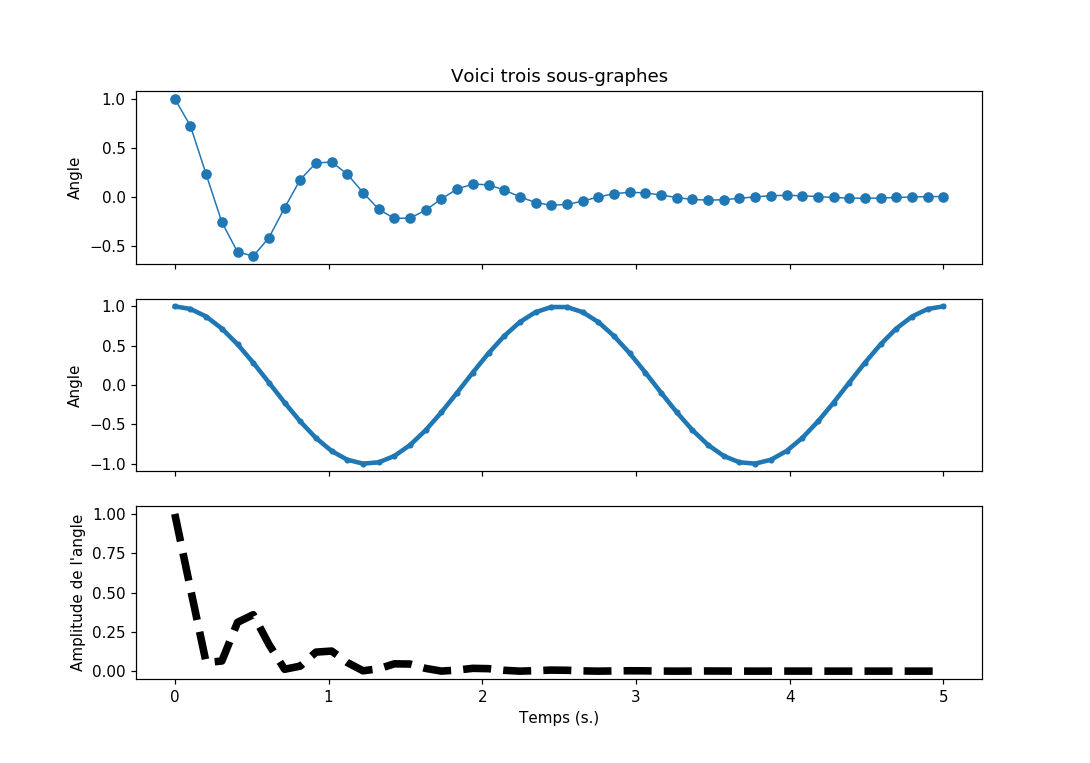

Text(0.5,0,'Temps (s.)')

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(10,7),sharex=True)

axes[0].plot(x1, y1, 'o-',linewidth=1)
axes[0].set_title('Voici trois sous-graphes')
axes[0].set_ylabel('Angle')


axes[1].plot(x1, y2, '.-', linewidth=3)
axes[1].set_ylabel('Angle')

axes[2].plot(x1, y1**2, '--',color='black', linewidth=5)
axes[2].set_ylabel("Amplitude de l'angle")
axes[2].set_xlabel('Temps (s.)')

# Couleurs: 
https://matplotlib.org/api/colors_api.html

Liste de couleurs en Python: {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'},  

## Couleurs par défaut:
Les couleurs par défauts sont gérées par ce qu'on appelle la **colormap** (carte de couleur).
Il en existe de nombreuses (cf. http://www.futurile.net/2016/03/31/colormaps-in-matplotlib/)

In [18]:
# Obtenir la colormap par défaut de Maptlotlib (viridis depuis la version 2)
cmap_name = plt.rcParams['image.cmap']
cmap = plt.cm.get_cmap(cmap_name)
print("La carte de couleur par défaut est : {}".format(cmap_name))

La carte de couleur par défaut est : viridis


<IPython.core.display.Javascript object>


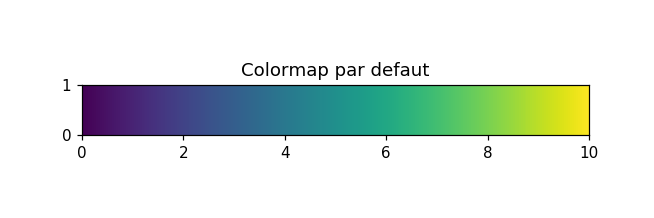

Text(0.5,1,'Colormap par defaut')

In [19]:
# Afficher la colormap par défaut
colors = cmap(np.arange(cmap.N))
fig = plt.figure(figsize=(6, 2))
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.title("Colormap par defaut")

# Liste des colormaps (palettes): 
https://matplotlib.org/tutorials/colors/colormaps.html

<IPython.core.display.Javascript object>


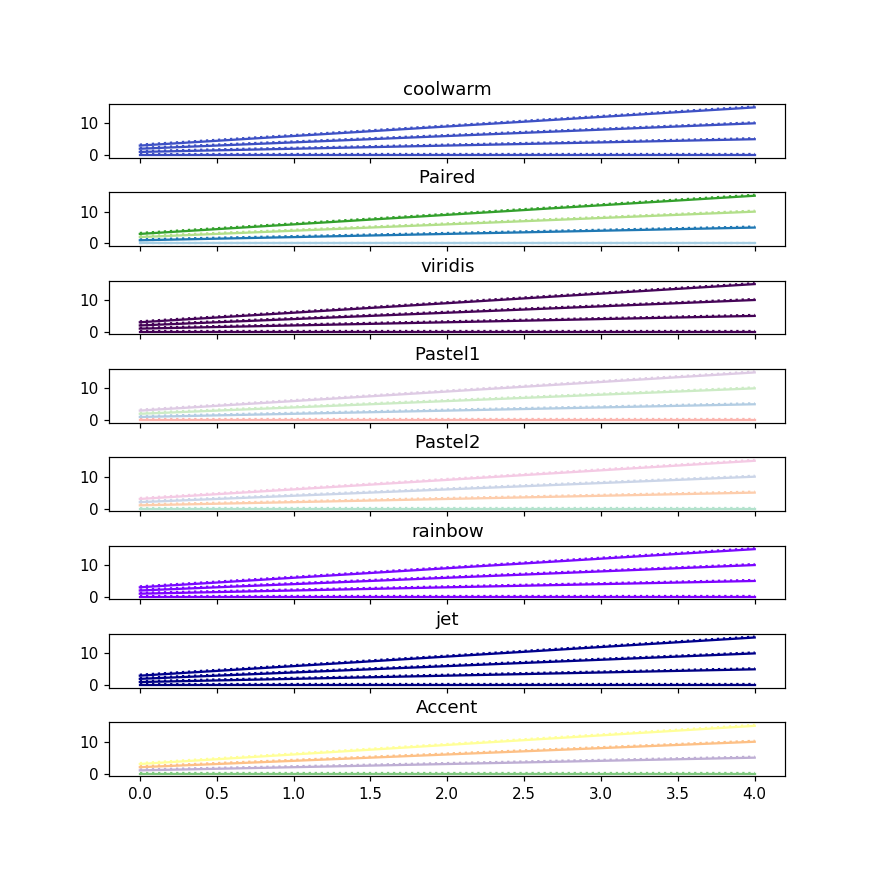

In [20]:
list_cmap = ['coolwarm', 'Paired', 'viridis',
             'Pastel1', 'Pastel2', 'rainbow', 'jet', 'Accent']
fig, axes = plt.subplots(len(list_cmap), 1, figsize=(8, 8), sharex=True)

for idx, cmap_name in enumerate(list_cmap):
    cmap = plt.get_cmap(cmap_name)
    t = np.arange(5)
    for i in range(4):
        axes[idx].plot(t, i * (t + 1),   color=cmap(i), linestyle='-')
        axes[idx].plot(t, i * (t + 1) + .3, color=cmap(i), linestyle=':')
        axes[idx].set_title(cmap_name)
    plt.show()
fig.subplots_adjust(hspace=0.65)

## Autres types de graphes

### Imshow:
affichage pour des matrices

<IPython.core.display.Javascript object>


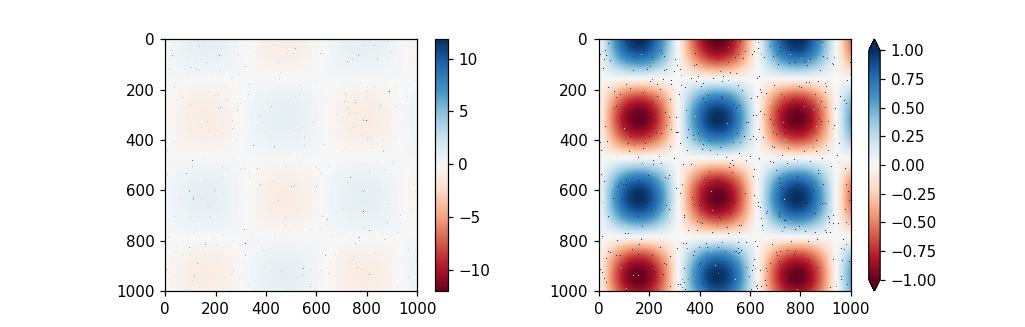

In [21]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(9.4, 3))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

### Autre: visualisation de données et seaborn

In [22]:
import seaborn as sns
import pandas as pd

In [23]:
from download import download

url = "http://josephsalmon.eu/enseignement/datasets/belgianmunicipalities.csv"
path_target = "./belgianmunicipalities.csv"

if not os.path.isfile(path_target):
    print("Télécharge")
    download(url, path_target, replace=False)
else:
    print("Données data_set déjà téléchargées!")

Données data_set déjà téléchargées!


In [24]:
df = pd.read_csv(path_target, index_col='Commune')
df = df.drop(['Unnamed: 0'],  axis=1)

In [25]:
dictionnaire = {1: 'Anv.', 2: 'Brab.', 3: 'Fl.occ.',
                4: 'Fl.or.', 5: 'Hainaut', 6: 'Liège',
                7: 'Limb.', 8: 'Lux.', 9: 'Namur'}
df = df.replace({'Province': dictionnaire})

## Barplots:
afficher la moyenne ou la médiane par région.



<IPython.core.display.Javascript object>


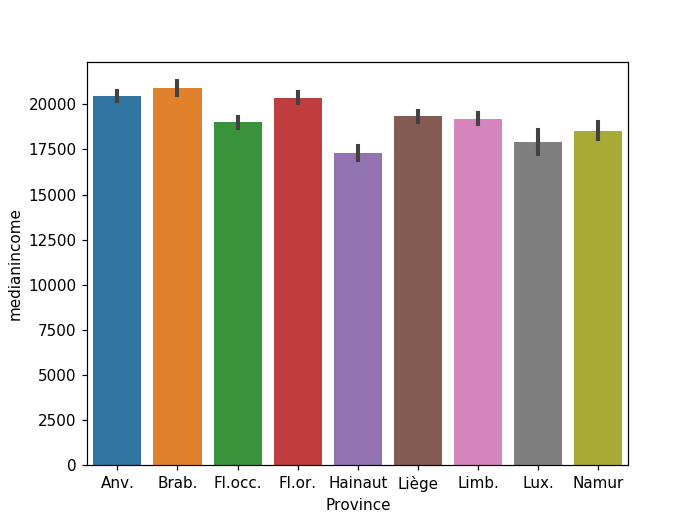

In [26]:
plt.figure()
fig_barplot = sns.barplot(x='Province', y='medianincome', data=df)

<IPython.core.display.Javascript object>


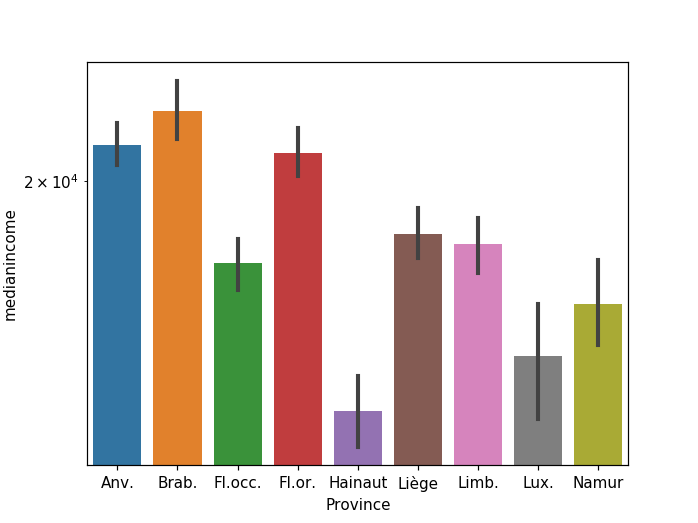

In [27]:
plt.figure()
fig_barplot = sns.barplot(x='Province', y='medianincome', data=df)
fig_barplot.set_yscale('log')


## Boxplots:
Visualiser la médiane, les quantiles 1/4 et 3/4, 1.5 inter-quartiles et outliers?
voir e.g. : http://www.itse.be/statistique2010/co/233_Cours_boxplot.html

<IPython.core.display.Javascript object>


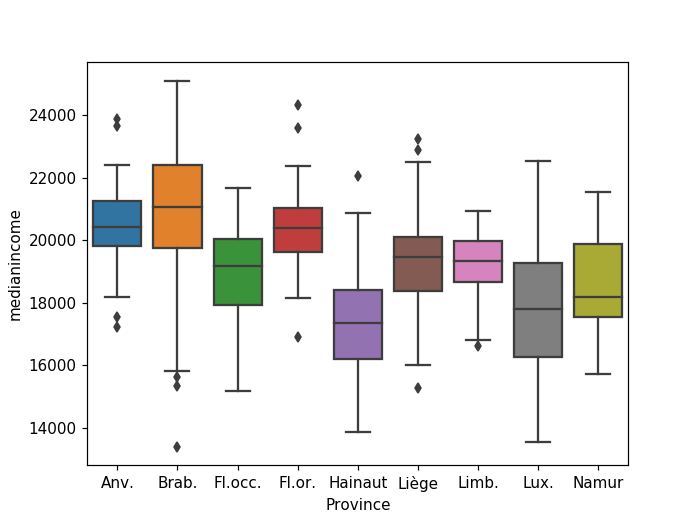

In [28]:
plt.figure()
fig_boxplot = sns.boxplot(x='Province', y='medianincome', data=df)

## Violons:
https://datavizcatalogue.com/methods/violin_plot.html

<IPython.core.display.Javascript object>


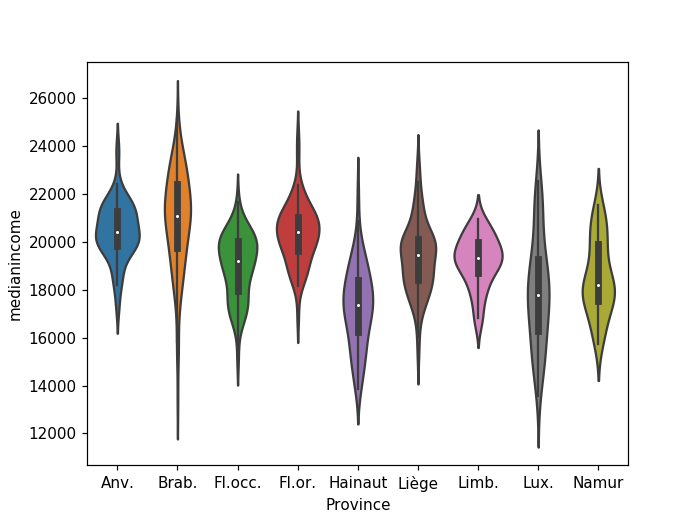

In [29]:
plt.figure()
sns.violinplot(x='Province', y='medianincome', data=df)

## Scatter plot (french: graphique de dispersion)
Corrélations entre la moyenne et la median des revenus

<IPython.core.display.Javascript object>


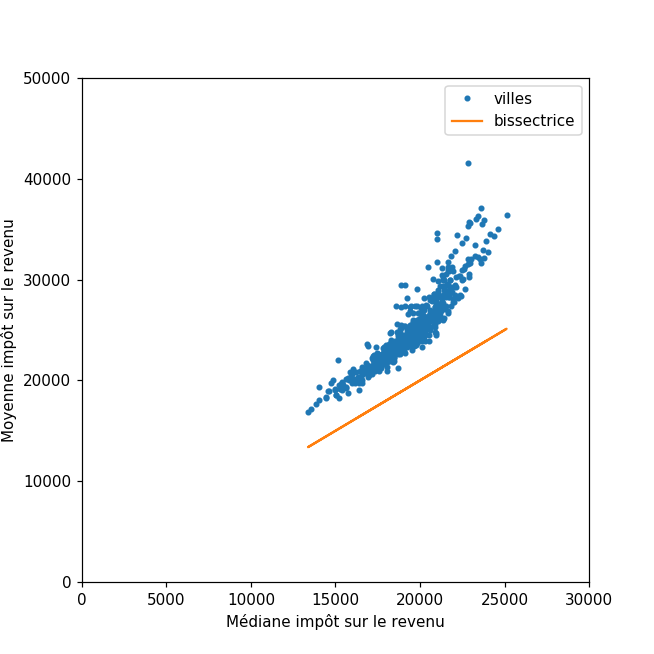

In [32]:
fig2 = plt.figure(figsize=(6, 6))
plt.plot(df['medianincome'], df['averageincome'], '.',label='villes')
plt.plot(df['medianincome'], df['medianincome'],label='bissectrice')
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.xlim((0, 30000))  # Démarre l'axe des x a 0 et fini a 30000
plt.ylim((0, 50000))  # Démarre l'axe des y a 0 et fini a 30000
plt.legend()


filename = "belgianmunicipalities"
image_name = os.path.join(dirname, filename + imageformat)
# fig2.savefig(image_name, bbox_inches='tight')

**Remarque**: la moyenne tire toujours la richesse d'une ville vers le haut par rapport à la médiane (un seul riche foyer ne change pas la médiane, mais change la moyenne potentiellement drastiquement).

## Scatter plot:
 ette fois on va afficher les points par couleur selon la région pour observer à une granularité plus précise

<IPython.core.display.Javascript object>


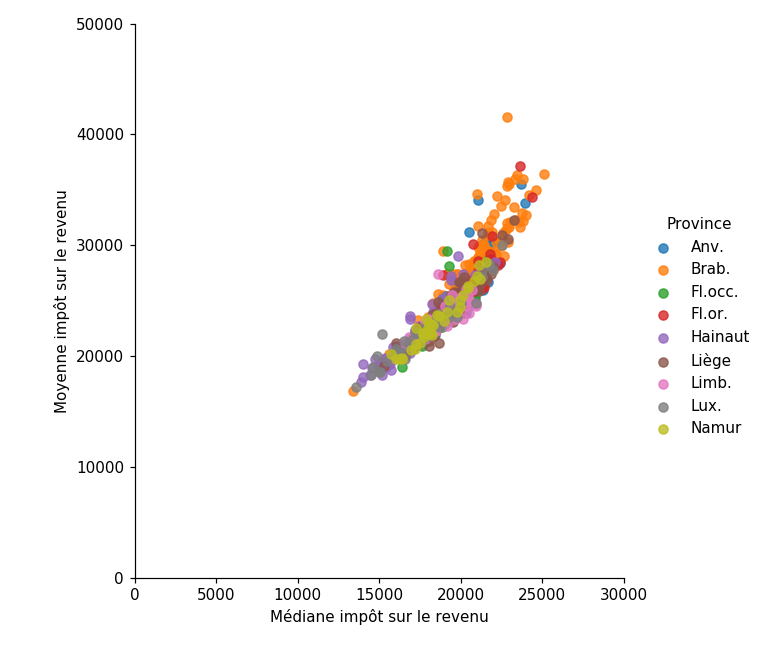

In [50]:
g = sns.lmplot(x='medianincome', y='averageincome',
           data=df, fit_reg=False, hue='Province')
g.fig.set_figheight(6)
g.fig.set_figwidth(7)
# plt.plot(df['medianincome'], df['medianincome'])
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.xlim((0, 30000))  # Démarre l'axe des x a 0 et fini a 30000
plt.ylim((0, 50000))  # Démarre l'axe des y a 0 et fini a 30000
filename = "belgianmunicipalities_clean"
image_name = os.path.join(dirname, filename + imageformat)
g.savefig(image_name, bbox_inches='tight')